# Custom Zimbabwe Base Model - Calibrate to 2020

In this file the objectives are as follows: 

1. See what the default model produces under different conditions:  
  a) without any calibration, when the country location and population size is specified only  
  b) when I adapt the number of contacts to be manicaland numbers  
  c) when I adapt the beta value  


2. Establish which callibration is the most effective for Zimbabwe: 
This will only happen very roughly here to try to get the number of cases and deaths within the right orders of magnitude for the country. Following this, in a separate program I can run Optuna or EMA workbench to figure out the exact number of contacts/beta values required at each point


3. Output results: 
So I can compare back under each set of circumstances

All of these will be run against the calibration data in the calibration_data folder on cases and deaths between 20th March 2020 and 10th October 2020


## 0. Import required packages

In [1]:
import covasim as cv
import numpy as np

Covasim 2.0.2 (2020-02-01) — © 2021 by IDM


## Scenario A See what default model produces  - only country location and pop size specified

In [2]:
pars = dict(
    pop_type = 'hybrid', # see documentation - this is a hybrid between random and a data derived model. Later, develop synthpop
    pop_size = 100e3,  # population of the Zim is 15 million. When I despecify this -- population default is again 20k 
    pop_scale= 15, # one agent represents 15 people 
    location = 'Zimbabwe',
    start_day = '2020-03-20',
    end_day = '2020-10-10',
    verbose = 0 # means it won't print all the output 
)


### Take a look at population characteristics from input data (of country (location) as defined above)
Nb. These are the same for every scenario

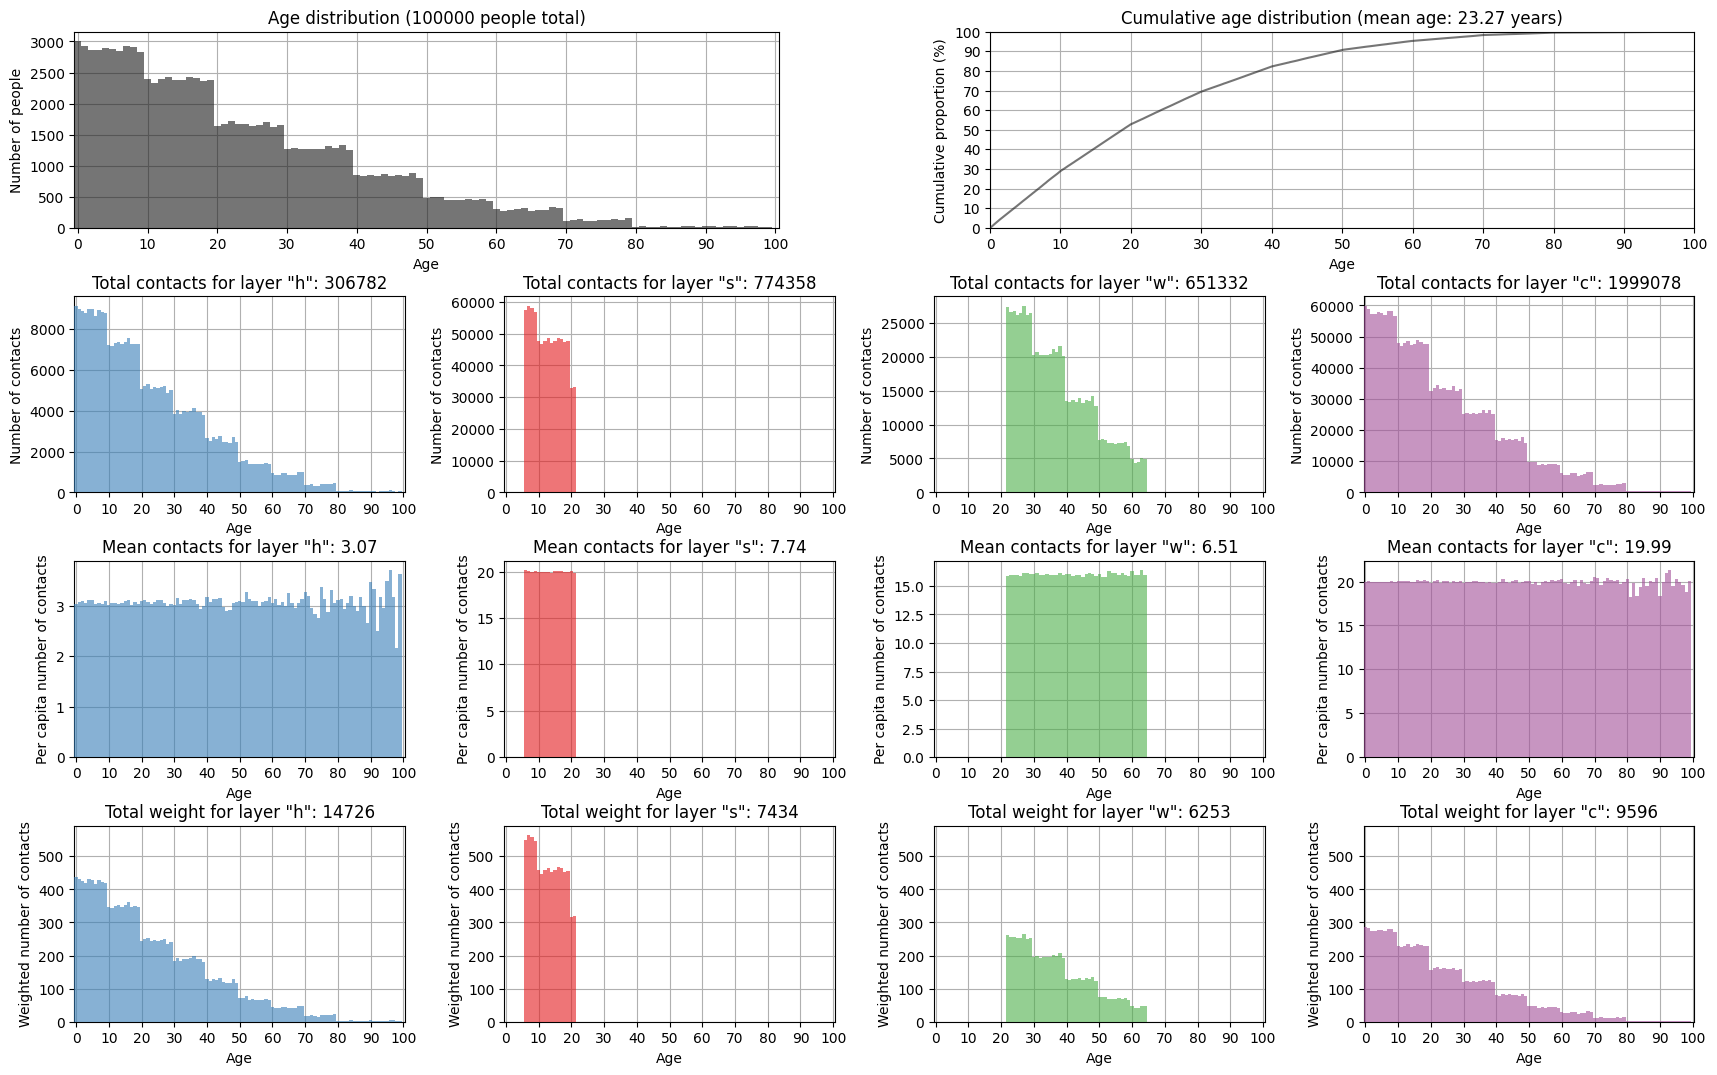

In [3]:
cv.options.set(dpi=100, show=False, close=True) #, verbose=0 # ) # put back in verbose once i've figured out what this does

sim = cv.Sim(pars)
sim.initialize()
fig = sim.people.plot()

# average age is 23.27 years

### run simulation for this default scenario 

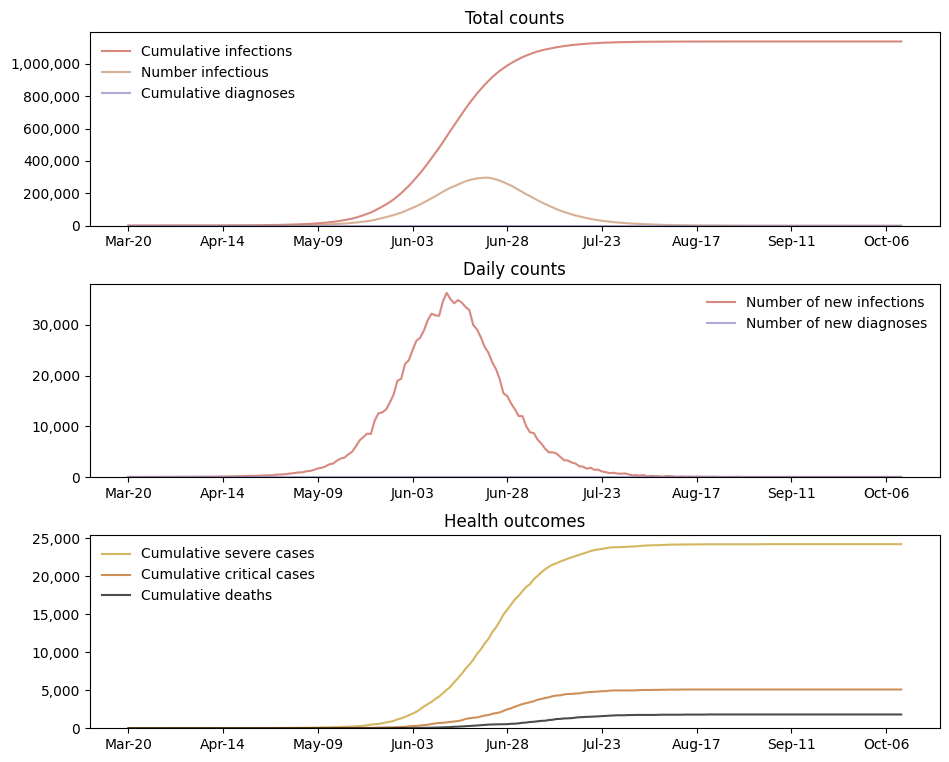

In [4]:
# just take a look at how changing beta changes the trajectory 
sim.run()
scenariofig = sim.plot()  
sim.plot()

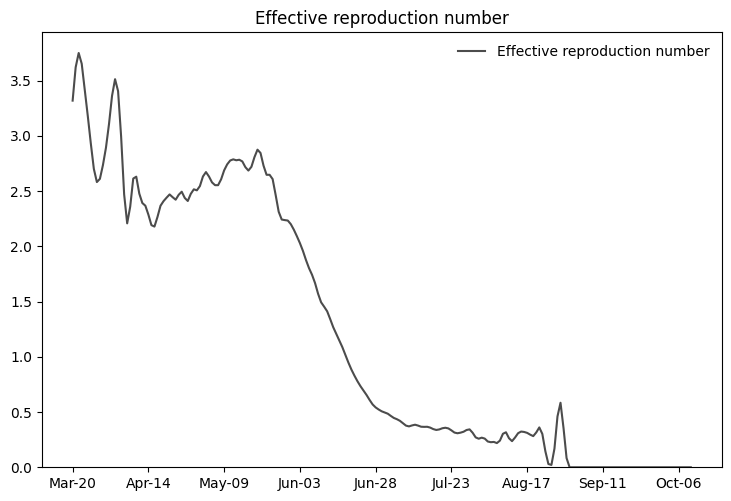

In [5]:
# take a look at the r value 
sim.plot_result('r_eff')

Notes on this run: 

- Smooth trajectory with peak in case numbers in mid-June (full details see col Y of output n_infectious) 
- Case numbers peak at around 35000 
- Deaths are below 1000 (full details see col K of output)
- R eff starts around 3.5 and drops completely to 0 by September (full details see col AH)

### Save output

In [9]:
sim.save('../outputs/zim-sim_default_scenario_A.sim')
sim.to_excel('../outputs/zim-sim_default_scenario_A.xlsx')

Object saved to /Users/sophieayling/Documents/GitHub/covasim/my_countries/ZIM/outputs/zim-sim_default_scenario_A.xlsx.


## Scenario B. Country location, pop size and number of contacts (Maincaland) specified

In [10]:
pars = dict(
    pop_type = 'hybrid', # see documentation - this is a hybrid between random and a data derived model. Later, develop synthpop
    pop_size = 100e3,  # population of the Zim is 15 million. When I despecify this -- population of ... 
    pop_scale= 15, # one agent represents 15 people 
    location = 'Zimbabwe',
    start_day = '2020-03-20',
    end_day = '2020-10-10',
    contacts=dict(h=6, s=6, w=4, c=2),
    #school_ages = [5, 21], 
    #work_ages = [20, 61],
    verbose = 0 # means it won't print all the output 
)


# other things you can re-define in pars include n_days, beta  (As below)

### run simulation for adapted contacts (Manicaland) scenario 

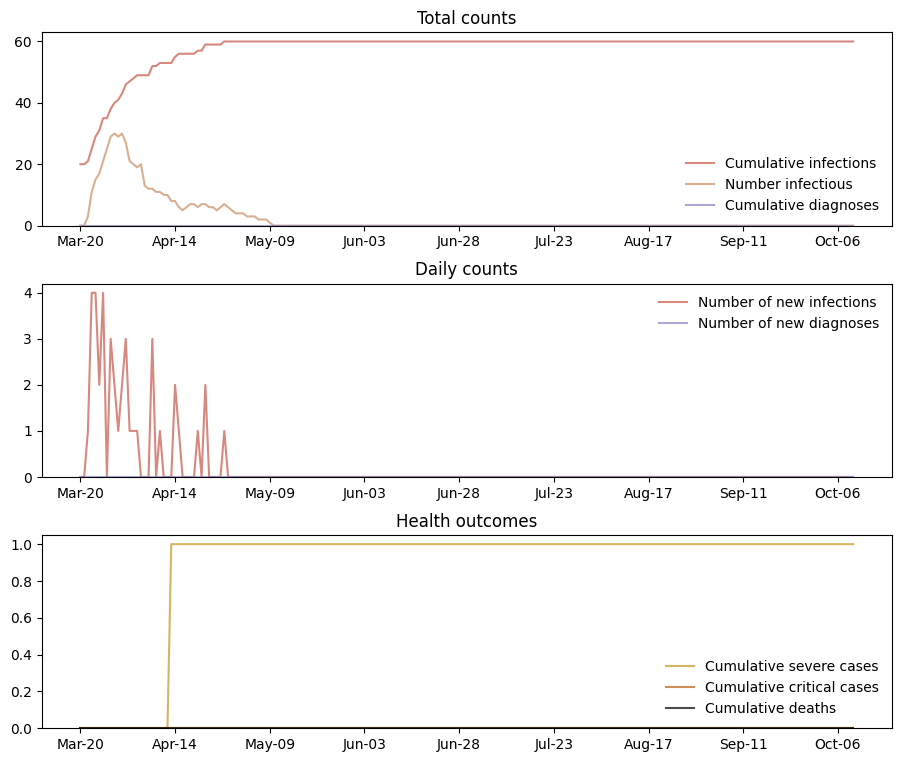

In [12]:
# just take a look at how changing beta changes the trajectory 
sim2 = cv.Sim(pars)
sim2.run()
scenariofig = sim2.plot()  #  this will only work if I run sim.run() not msim.run()
sim2.plot()

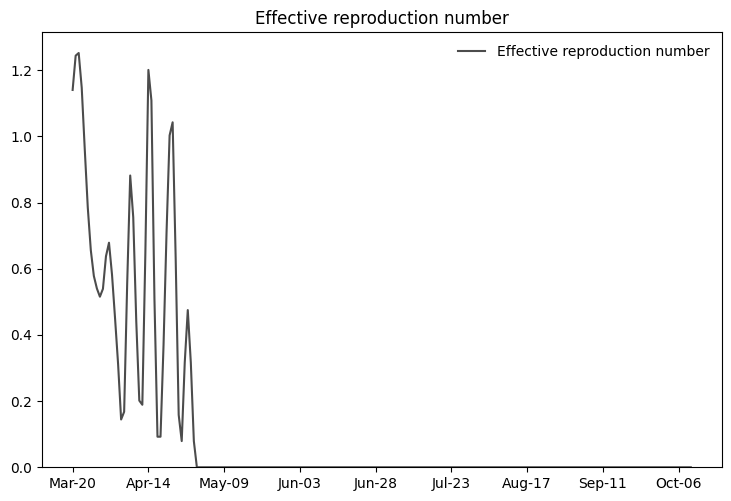

In [13]:
# take a look at the r value 
sim2.plot_result('r_eff')

Notes on this run: 

- Smooth trajectory with peak in case numbers at the middle of March (full details see col Y of output n_infectious) 
- Case numbers peak at around 4 
- Deaths are below 1! (full details see col K of output)
- R eff starts around 1.2 and drops completely to 0 by May (full details see col AH)

### Save output

In [14]:
sim.save('../outputs/zim-sim_manicaland_scenario_B.sim')
sim.to_excel('../outputs/zim-sim_manicaland_scenario_B.xlsx')

Object saved to /Users/sophieayling/Documents/GitHub/covasim/my_countries/ZIM/outputs/zim-sim_manicaland_scenario_B.xlsx.


Before running Scenario C where I change default Beta values, I want to look at the validation data and see if I can infer an R value

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns


In [19]:
# import the data
df_cases = pd.read_stata('../calibration_data/national_cases_by_day.dta')
df_deaths = pd.read_stata('../calibration_data/national_deaths_by_day.dta')

In [28]:
df_cases.head()
# want to convert the values to integers will figure out later

,date,cases_by_day
0,2020-03-20,2.0
1,2020-03-24,1.0
2,2020-03-25,1.0
3,2020-03-27,3.0
4,2020-03-30,1.0


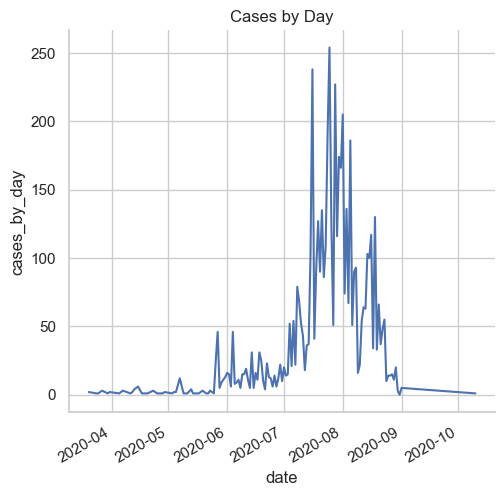

In [54]:
g = sns.relplot(x="date", y="cases_by_day", kind="line", data=df_cases).set(title="Cases by Day")
g.fig.autofmt_xdate()

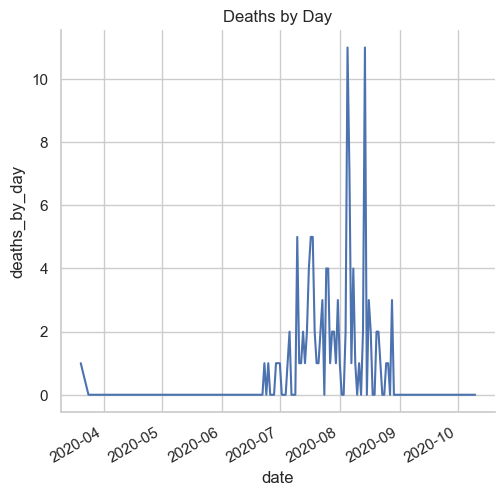

In [55]:
g = sns.relplot(x="date", y="deaths_by_day", kind="line", data=df_deaths).set(title="Deaths by Day")
g.fig.autofmt_xdate()

## 1c. Country location, pop size and number of contacts (Maincaland) specified & Beta value adapted

In [58]:
pars = dict(
    pop_type = 'hybrid', # see documentation - this is a hybrid between random and a data derived model. Later, develop synthpop
    pop_size = 100e3,  # population of the Zim is 15 million. When I despecify this -- population of ... 
    pop_scale= 15, # one agent represents 15 people 
    location = 'Zimbabwe',
    start_day = '2020-03-20',
    end_day = '2020-10-10',
    contacts=dict(h=6, s=6, w=4, c=2),
    #beta_layer  = dict(h=3.0, s=0.6, w=0.6, c=0.3),  # Per-population beta weights; 
    verbose = 0 # means it won't print all the output 
)



In [110]:
cv.options.set(dpi=100, show=False, close=True) #, verbose=0 # ) # put back in verbose once i've figured out what this does

#change the transmission rate (default beta value is 0.016?) -- you can also change the relative weighting of beta in h,s,w,c in Line 145
cb = cv.change_beta(days=['2020-04-01'], changes=[2.5])  # days=['2020-04-06'],
# increasing the beta on around 1st August 

sim3 = cv.Sim(pars, interventions=cb, label='With changes in RO from 1st March')

## 4. Run base simulation

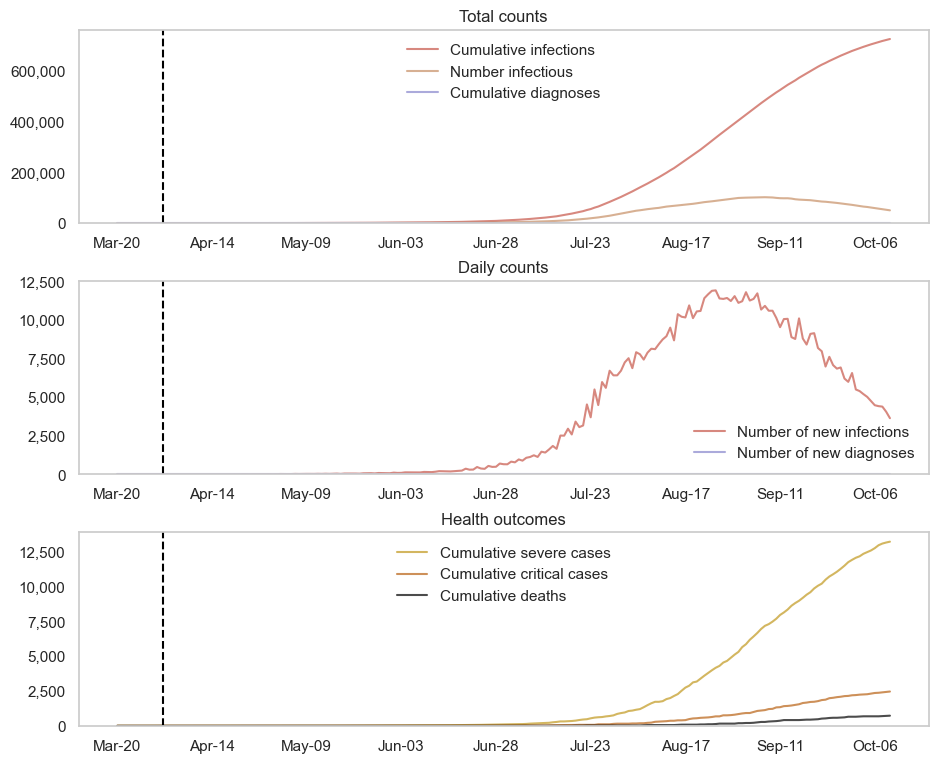

In [111]:
# just take a look at how changing beta changes the trajectory 
sim3.run()
scenariofig = sim3.plot()  #  this will only work if I run sim.run() not msim.run()
sim3.plot()

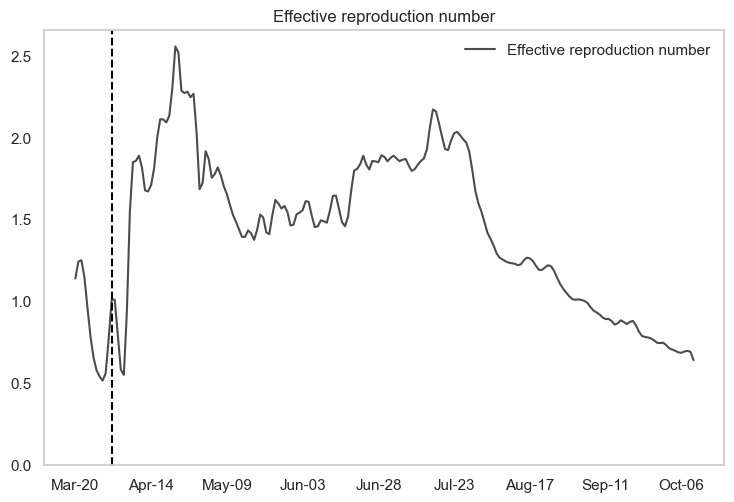

In [112]:
# take a look at the r value 
sim3.plot_result('r_eff')

## 7. Save output

In [ ]:
sim3.run()
sim3.save('zim-sim_change_beta.sim')
sim3.to_excel('drc-sim_vaccinate_15-65s.xlsx')